In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import scipy
import seaborn as sns

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(statsmodels.__version__)
print(scipy.__version__)
print(sns.__version__)

2.0.3
1.25.2
3.7.2
0.14.0
1.11.1
0.12.2


In [16]:
df = pd.read_csv('./data/kaggle_survey_2020/kaggle_survey_2020_responses.csv', low_memory=False)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [13]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
questions = df.iloc[0, : ].T
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [15]:
df = df.drop(0)

In [16]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [20]:
df['Q25'].value_counts()

Q25
$0 ($USD)                  3856
$1000-$9,999               1829
$100-$999                  1764
$1-$99                     1317
$10,000-$99,999            1075
$100,000 or more ($USD)     729
Name: count, dtype: int64

In [22]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)


In [25]:
import plotly.express as px
import plotly.gragh_objects as go

ModuleNotFoundError: No module named 'plotly.gragh_objects'

In [ ]:
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@5.3.1
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@5.3.1


In [3]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [4]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px

<class 'plotly.graph_objs._figure.Figure'>


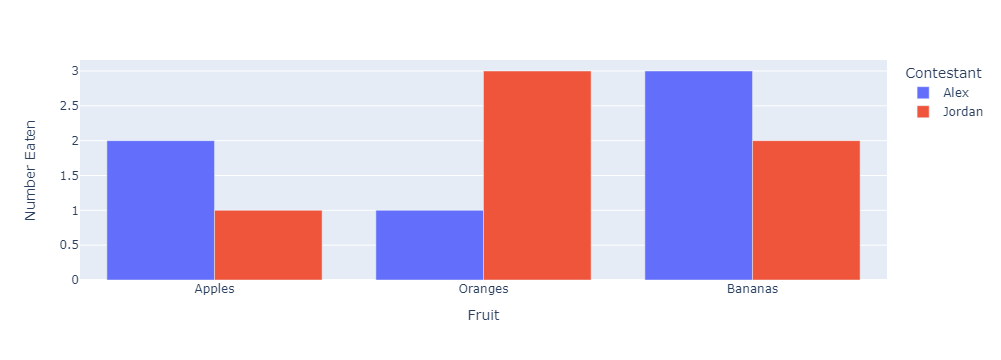

In [11]:
fig = px.bar(temp, x = 'Fruit', y = 'Number Eaten', color = 'Contestant', barmode = 'group')
print(type(fig))
fig.show()

<class 'plotly.graph_objs._figure.Figure'>


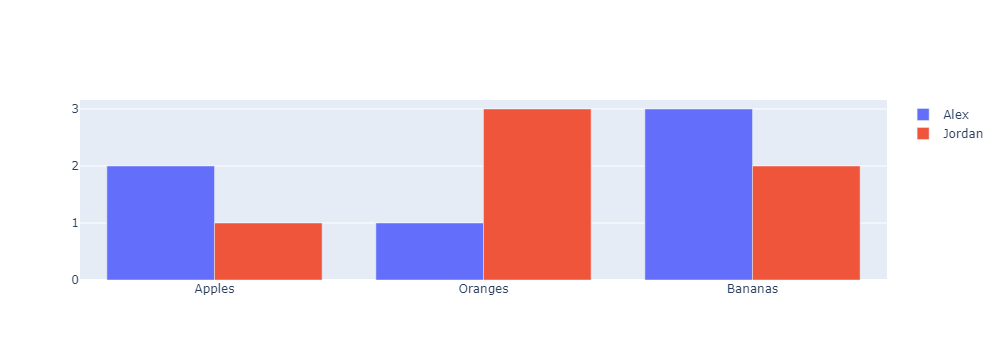

In [12]:
import plotly.graph_objects as go
fig = go.Figure()
print(type(fig))
fig.add_trace(go.Bar(name ='Alex', x = temp['Fruit'], y = temp[temp['Contestant'] == 'Alex']['Number Eaten'].values))
fig.add_trace(go.Bar(name ='Jordan', x = temp['Fruit'], y = temp[temp['Contestant'] == 'Jordan']['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show()

In [14]:
fig = px.bar(temp, x = 'Fruit', y = 'Number Eaten', color = 'Contestant', barmode = 'group')
fig.show('json')

In [17]:
df['Q1'].value_counts()

Q1
25-29                          4011
22-24                          3786
18-21                          3469
30-34                          2811
35-39                          1991
40-44                          1397
45-49                           988
50-54                           698
55-59                           411
60-69                           398
70+                              76
What is your age (# years)?       1
Name: count, dtype: int64

In [20]:
questions.Q1

'What is your age (# years)?'

In [30]:
q1_df = df['Q1'].value_counts()
q1_df

Q1
25-29                          4011
22-24                          3786
18-21                          3469
30-34                          2811
35-39                          1991
40-44                          1397
45-49                           988
50-54                           698
55-59                           411
60-69                           398
70+                              76
What is your age (# years)?       1
Name: count, dtype: int64

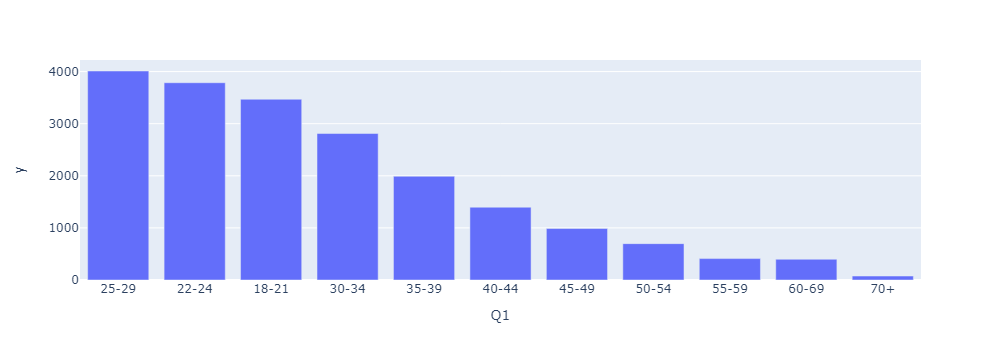

In [31]:
# "What is your age (# years)?" 라벨 제거
q1_df = q1_df.drop("What is your age (# years)?")

# 막대 그래프 그리기
fig = px.bar(q1_df, x=q1_df.index, y=q1_df.values, labels={'index':'Age Group', 'value':'Count'})
fig.show()


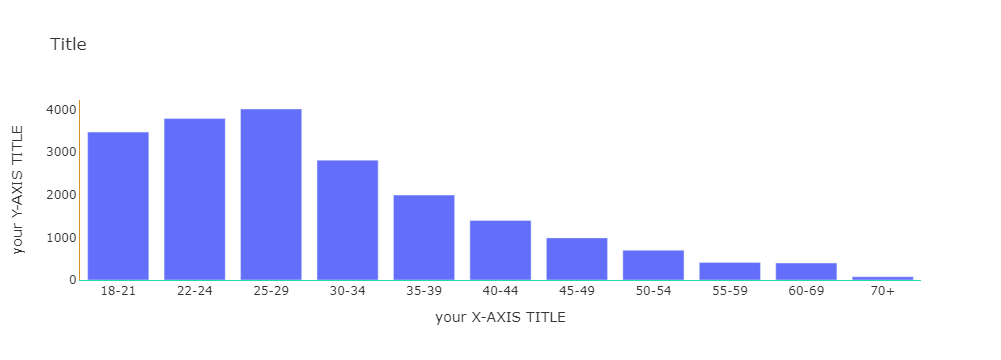

In [39]:
q1_df = df['Q1'].value_counts()
q1_df = q1_df.drop("What is your age (# years)?")
CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]
fig = go.Figure()
fig.add_trace(go.Bar(x= q1_df.index, y = q1_df.values))

#styling update
fig.update_layout(plot_bgcolor = 'white', 
                  font = dict(color = "#333333"),
                  title = dict(text = 'Title'),
                  xaxis = dict(title = "your X-AXIS TITLE", linecolor = "#21DBAA", categoryorder = "array", categoryarray = CATEGORY_ORDER), 
                 yaxis = dict(title = "your Y-AXIS TITLE", linecolor = "#DB9021"),
                 )

fig.show()